# EDA Section

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import models
from tensorflow.keras import layers
keras.__version__

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'2.1.6-tf'

## Read training and testing datasets

In [4]:
data_training = pd.read_csv('training_data_full_clean.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data_testing = pd.read_csv('testing_data_full_clean.csv')

In [6]:
#rawData = pd.read_csv('datathon_propattributes.csv')
#slicedData = rawData[:100]
data = data_training
#data = data.drop([])
#data['sale_amt'].describe()

## Visualize distribution of variables

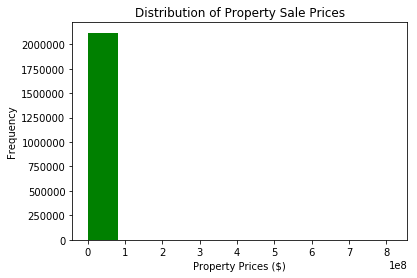

In [7]:
#Distribution of Property Sale Prices
plt.hist(data.sale_amt, facecolor = 'green')
plt.xlabel('Property Prices ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Property Sale Prices')
plt.show()

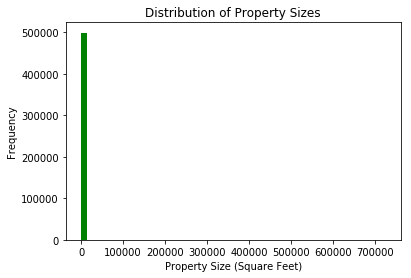

In [8]:
#Distribution of Property Square Feet
plt.hist(data.building_square_feet, 50, facecolor = 'green')
plt.xlabel('Property Size (Square Feet)')
plt.ylabel('Frequency')
plt.title('Distribution of Property Sizes')
plt.show()

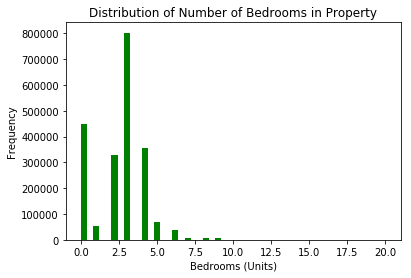

In [8]:
#Distribution of Number of Bedrooms in Property
plt.hist(data.bedrooms, 50, facecolor = 'green')
plt.xlabel('Bedrooms (Units)')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Bedrooms in Property')
plt.show()

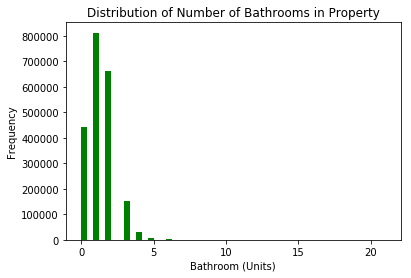

In [9]:
#Distribution of Number of Bathrooms in Property
plt.hist(data.total_baths_calculated, 50, facecolor = 'green')
plt.xlabel('Bathroom (Units)')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Bathrooms in Property')
plt.show()

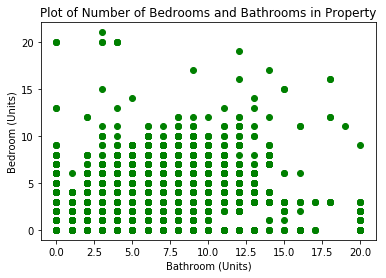

In [10]:
#Scatter Plot of Number of Bedrooms and Bathrooms in Property
plt.scatter(data.bedrooms,data.total_baths_calculated,facecolor = 'green')
plt.xlabel('Bathroom (Units)')
plt.ylabel('Bedroom (Units)')
plt.title('Plot of Number of Bedrooms and Bathrooms in Property')
plt.show()

# Neural Nets Section

## Train_val split

In [11]:
data_training['land_square_footage'].describe()

count    2.117845e+06
mean     6.035064e+04
std      1.073455e+06
min      0.000000e+00
25%      2.000000e+03
50%      7.500000e+03
75%      2.008600e+04
max      5.793306e+08
Name: land_square_footage, dtype: float64

In [17]:
y = data_training.sale_amt
yy = data_testing.sale_amt
#X = data_10000[['prop_zip_code','land_square_footage',
#                           'building_square_feet','effective_year_built',
#                          'bedrooms','total_baths_calculated','air_conditioning_Yes',
#                           'condition_Excellent','heating_type_Yes']]
#df[((df.B - df.B.mean()) / df.B.std()).abs() < 3]
X = data_training.drop(columns = ['sale_amt','stories_cd'])
XX = data_testing.drop(columns = ['sale_amt','stories_cd'])
#X.drop(X.columns[cols],axis=1,inplace=True)
#X = tf.keras.utils.normalize(X)
#X.head

In [18]:
#list(X)
y = np.log1p(y)
X = np.log1p(X)
yy = np.log1p(yy)
XX = np.log1p(XX)

In [14]:
X.isnull().values.any()

False

In [15]:
XX.isnull().values.any()

False

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, _, y_test, _ = train_test_split(XX, yy, test_size = 0, random_state=42)

mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

X_val -= mean
X_val /= std

In [20]:
#train_data.shape
X_train.shape
#y_train.shape

(1482491, 176)

In [21]:
X_train.shape[1]

176

In [22]:
#val_data.shape
X_val.shape
#y_val.shape

(635354, 176)

In [23]:
def build_model():
    model = models.Sequential()
    model.add(keras.layers.Dense(256, activation='relu',
                           input_shape=(X_train.shape[1],)))
    #model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dropout(0.1))
    #model.add(keras.layers.Dense(256, activation='relu'))
    #model.add(keras.layers.Dense(256, activation='relu'))
    #model.add(keras.layers.Dense(256, activation='relu'))
    #model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    #model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

In [24]:
# fix random seed
seed = 123
np.random.seed(seed)

In [ ]:
# Build the Keras model (already compiled)
model = build_model()
# Train the model (in silent mode, verbose=0)
history = model.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_val, y_val))

Train on 1482491 samples, validate on 635354 samples
Epoch 1/40
1125008/1482491 [=====================>........] - ETA: 1:04 - loss: 0.9061 - mean_absolute_error: 0.5888

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               45312     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
__________

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [56]:
# Evaluate the model on the validation data
val_mse, val_mae = model.evaluate(X_val, y_val)

119776/120000 [============================>.] - ETA: 0s - loss: 0.6176 - mean_absolute_error: 0.4623

In [57]:
results = model.evaluate(X_val, y_val)
results

119296/120000 [============================>.] - ETA: 0s - loss: 0.6178 - mean_absolute_error: 0.4624

[0.6185807264328003, 0.46237445]

In [58]:
preds = model.predict(X_test)

In [59]:
predss = [preds[i][0] for i in range(len(preds))]
predss = np.array(predss)

In [60]:
predss_exp = np.exp(predss)+1

In [61]:
predss_exp

array([520712.03 , 117285.016,  84041.984, ...,  24519.646,  19443.404,
       188587.16 ], dtype=float32)

In [62]:
y_test = np.array(y_test)

In [63]:
y_test_exp = np.exp(y_test) +1

In [64]:
y_test

array([13.74294094, 11.69525536, 11.37367489, ..., 11.40757606,
       10.46313191,  9.6091836 ])

In [65]:
accuracy = ((predss-y_test)/y_test)
#accuracy = accuracy_score(y_val, predss)
accuracy.mean()

0.00891655767034079

In [66]:
accuracy_exp = ((predss_exp-y_test_exp)/y_test_exp)
#accuracy = accuracy_score(y_val, predss)
accuracy_exp.mean()

6.79141826607243

In [67]:
#evaluate your model on the test set
results = model.evaluate(X_test, y_test)

399360/400000 [============================>.] - ETA: 0s - loss: 2.7437 - mean_absolute_error: 1.1828

In [68]:
#run this to see your mae
results[1]

1.1828089